# C19: Project: Handwritten Digit Recognition

## 1. Download Dataset

MNIST dataset will be download automatically and saved at ~/.keras/datasets/mnist.pkl.gz as a 15M file by Keras, when you first time called it.

Plot some instances of MNIST

In [1]:
from keras.datasets import mnist
import matplotlib as mpl
mpl.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

(X_train, Y_train), (X_val, Y_val) = mnist.load_data()

print X_train.shape, Y_train.shape
print X_train.dtype, Y_train.dtype

(60000, 28, 28) (60000,)
uint8 uint8


Using Theano backend.


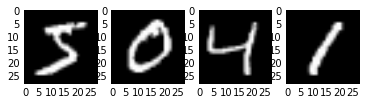

In [2]:
plt.subplot(141)
plt.imshow(X_train[0], cmap='gray')
plt.subplot(142)
plt.imshow(X_train[1], cmap='gray')
plt.subplot(143)
plt.imshow(X_train[2], cmap='gray')
plt.subplot(144)
plt.imshow(X_train[3], cmap='gray')
plt.show()

## 2. Prepare Dataset

In [3]:
# flatten 28*28 iamge to a 784 vector
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_val = X_val.reshape(X_val.shape[0], num_pixels).astype('float32')

In [4]:
# normalize inputs from 0~255 to 0~1
X_train = X_train / 255
X_val = X_val / 255

In [5]:
# transform Y to one-hot-vector form
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
num_classes = Y_train.shape[1]

print Y_train.shape

(60000, 10)


## 3. Fully-Connect Neural Network

Use Fc NN as a baseline model

In [6]:
from keras.models import Sequential
from keras.layers import Dense


# define a fc nn
def create_fc_nn():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
    model.add(Dense(num_classes, init='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# create and train a model
model = create_fc_nn()
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), nb_epoch=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
3s - loss: 0.2771 - acc: 0.9210 - val_loss: 0.1457 - val_acc: 0.9586
Epoch 2/10
3s - loss: 0.1123 - acc: 0.9676 - val_loss: 0.0977 - val_acc: 0.9693
Epoch 3/10
4s - loss: 0.0711 - acc: 0.9797 - val_loss: 0.0779 - val_acc: 0.9762
Epoch 4/10
4s - loss: 0.0506 - acc: 0.9857 - val_loss: 0.0699 - val_acc: 0.9796
Epoch 5/10
4s - loss: 0.0360 - acc: 0.9896 - val_loss: 0.0651 - val_acc: 0.9806
Epoch 6/10
4s - loss: 0.0262 - acc: 0.9928 - val_loss: 0.0603 - val_acc: 0.9802
Epoch 7/10
4s - loss: 0.0202 - acc: 0.9947 - val_loss: 0.0579 - val_acc: 0.9815
Epoch 8/10
4s - loss: 0.0141 - acc: 0.9968 - val_loss: 0.0588 - val_acc: 0.9817
Epoch 9/10
4s - loss: 0.0101 - acc: 0.9980 - val_loss: 0.0563 - val_acc: 0.9813
Epoch 10/10
4s - loss: 0.0072 - acc: 0.9988 - val_loss: 0.0582 - val_acc: 0.9823


In [7]:
# evaluate baseline model
scores = model.evaluate(X_val, Y_val, verbose=0)
print("FC NN Accuracy: %.2f%%"%(scores[1]*100))

FC NN Accuracy: 98.23%


## 4. Simple Convolutional Neural Network

### 4.1 Preparation

In [8]:
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
import numpy as np

In [9]:
# fix random seed
seed = 7
np.random.seed(seed)

In [10]:
# resize dataset
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_val = X_val.reshape(X_val.shape[0], 1, 28, 28).astype('float32')
print X_train.shape

(60000, 1, 28, 28)


### 4.2 Define a CNN

The structure of CNN is below:

    1. The first hidden layer is a convolutional layer called a Convolution2D. The layer has 32 feature maps, which with the size of 5x5 and a rectifier activation function. This is the input layer, expecting images with the structure outline above.
    
    2. Next we define a pooling layer that takes the maximum value called MaxPooling2D. It is configured with a pool size of 2x2.
    
    3. The next layer is a regularization layer using dropout called Dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
    
    4. Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the output to be processed by standard fully connected layers.
    
    5. Next a fully connected layer with 128 neurons and rectifier activation function is used.
    
    6. Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.

![CNN Structure](./figures/c19_cnn_structure.png)

In [11]:
# define a simple cnn
def create_cnn():
    model = Sequential()
    model.add(Convolution2D(32, 5, 5, border_mode='valid', input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

### 4.3 Build and Fit the CNN

In [12]:
# build a model
cnn_model = create_cnn()

# fit the model
cnn_model.fit(X_train, Y_train, validation_data=(X_val, Y_val), nb_epoch=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
42s - loss: 0.2412 - acc: 0.9318 - val_loss: 0.0755 - val_acc: 0.9767
Epoch 2/10
41s - loss: 0.0727 - acc: 0.9781 - val_loss: 0.0532 - val_acc: 0.9823
Epoch 3/10
42s - loss: 0.0496 - acc: 0.9850 - val_loss: 0.0388 - val_acc: 0.9859
Epoch 4/10
43s - loss: 0.0413 - acc: 0.9869 - val_loss: 0.0414 - val_acc: 0.9863
Epoch 5/10
43s - loss: 0.0321 - acc: 0.9898 - val_loss: 0.0380 - val_acc: 0.9869
Epoch 6/10
43s - loss: 0.0283 - acc: 0.9908 - val_loss: 0.0417 - val_acc: 0.9866
Epoch 7/10
44s - loss: 0.0222 - acc: 0.9930 - val_loss: 0.0322 - val_acc: 0.9891
Epoch 8/10
43s - loss: 0.0198 - acc: 0.9937 - val_loss: 0.0370 - val_acc: 0.9885
Epoch 9/10
42s - loss: 0.0160 - acc: 0.9948 - val_loss: 0.0337 - val_acc: 0.9880
Epoch 10/10
44s - loss: 0.0142 - acc: 0.9956 - val_loss: 0.0311 - val_acc: 0.9894


### 4.4 Evaluate CNN

In [13]:
scores = cnn_model.evaluate(X_val, Y_val, verbose=0)
print("CNN Accuracy: %.2f%%"%(scores[1]*100))

CNN Accuracy: 98.94%
